# Shell DigData Project Submission

---


## By Aadam Ul Haq and Ameer Ali Saleem

A notebook detailing the coding portion of the Shell DigData Step Up Challenge.

# Exploratory Data Analysis

We begin by exploring the datasets in an attempt to spot patterns and deal with erroneous data values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# importing datasets
daily = pd.read_csv('daily.csv')
hourly = pd.read_csv('hourly.csv')
weekly = pd.read_csv('weekly.csv')
monthly = pd.read_csv('monthly.csv')

In [3]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DateHour                             8760 non-null   object 
 1   Wind_Speed_Actual_Knots              8751 non-null   float64
 2   Production_Actual_MWh                8760 non-null   float64
 3   Production_Forecast_1hour_MWh        8760 non-null   float64
 4   Production_Forecast_6hour_MWh        8760 non-null   float64
 5   Production_24hour_MWh                8760 non-null   float64
 6   Electricity_Prices_Day_Ahead_Dollar  8760 non-null   float64
 7   Electricity_Prices_Spot_Dollar       8760 non-null   float64
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [4]:
hourly.describe()

,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
count,8751.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,15.150708,219.800691,207.072518,201.079037,191.862525,95.375027,93.285188
std,9.704591,320.797377,310.996068,305.458660,297.399502,25.168086,24.454762
min,-0.360000,-0.001400,0.002200,0.020000,0.010900,-11.400000,-10.890000
25%,7.990000,16.328050,14.755025,14.533400,14.766700,78.655000,76.970000
50%,12.850000,68.025850,61.688150,58.839600,55.213650,93.655000,91.515000
75%,20.125000,262.959775,238.127150,231.540450,211.982350,110.755000,108.260000
max,65.620000,1100.000000,1100.000000,1100.000000,1100.000000,317.590000,311.980000


In [5]:
# should not have negative values for any of the columns!

hourly_numeric_cols = hourly.select_dtypes(include=np.number)
hourly[(hourly[hourly_numeric_cols.columns] > 0).all(1)]

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36
...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,19.32,230.6487,351.0614,368.7158,430.8759,84.08,84.31
8756,31/12/2022 20:00,21.41,313.8503,353.9471,397.6853,469.8260,79.62,80.74
8757,31/12/2022 21:00,24.49,469.9885,328.6710,456.5035,536.3732,89.78,89.57
8758,31/12/2022 22:00,26.22,576.7006,444.4528,444.3124,594.8571,78.61,77.90


In [6]:
# remove negative values from DataFrame for now
hourly = hourly[(hourly[hourly_numeric_cols.columns] > 0).all(1)]

In [7]:
hourly.head()

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36


In [8]:
hourly.count()

DateHour                               8737
Wind_Speed_Actual_Knots                8737
Production_Actual_MWh                  8737
Production_Forecast_1hour_MWh          8737
Production_Forecast_6hour_MWh          8737
Production_24hour_MWh                  8737
Electricity_Prices_Day_Ahead_Dollar    8737
Electricity_Prices_Spot_Dollar         8737
dtype: int64

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots'>

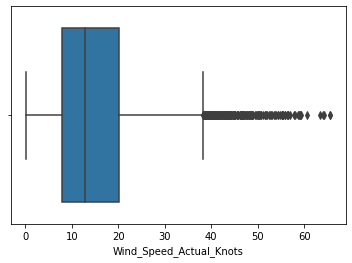

In [9]:
sns.boxplot(x=hourly.iloc[:,1])

In [10]:
daily.head()

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
0,01/01/2022,17516,17925
1,02/01/2022,17578,17430
2,03/01/2022,16044,16407
3,04/01/2022,17471,17890
4,05/01/2022,17835,18080


In [11]:
daily.isnull().sum()

Date                           0
Hydrogen_Demand_Actual_KG      0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

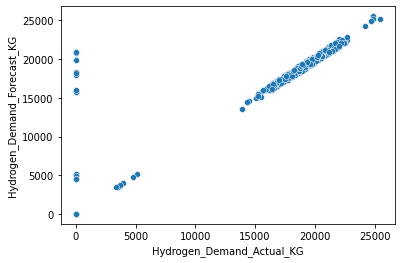

In [12]:
sns.scatterplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

In [13]:
# count the number of rows where actual hydrogen demand was supposedly zero
daily[daily.iloc[:,1]==0].count()

Date                           28
Hydrogen_Demand_Actual_KG      28
Hydrogen_Demand_Forecast_KG    28
dtype: int64

In [14]:
# for now, we will simply omit these rows
daily = daily[daily['Hydrogen_Demand_Actual_KG'] != 0]
daily = daily[daily['Hydrogen_Demand_Forecast_KG'] != 0]

daily[daily.iloc[:,1]==0].count()

Date                           0
Hydrogen_Demand_Actual_KG      0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

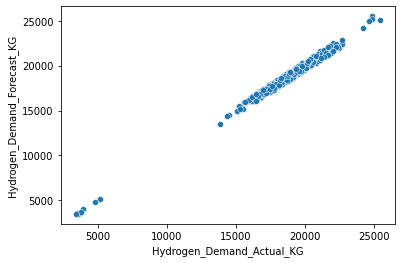

In [15]:
sns.scatterplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

In [16]:
weekly.isnull().sum()

Week Commencing                0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

In [17]:
weekly.head()

,Week Commencing,Hydrogen_Demand_Forecast_KG
0,03/01/2022,123741
1,10/01/2022,120664
2,17/01/2022,121831
3,24/01/2022,122544
4,31/01/2022,122957


In [18]:
weekly.count()

Week Commencing                52
Hydrogen_Demand_Forecast_KG    52
dtype: int64

In [19]:
monthly.count()

Month                                12
Hydrogen_Daily_Demand_Forecast_KG    12
dtype: int64

In [20]:
monthly.isnull().sum()

Month                                0
Hydrogen_Daily_Demand_Forecast_KG    0
dtype: int64